In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sizeSl = 6
stepSl = 0.3
radiusSl = stepSl / 3

In [3]:
def slopeField(foo):
    for t in np.arange(radiusSl, sizeSl, stepSl):
        for x in np.arange(radiusSl, sizeSl, stepSl):
            curGrad = foo(t, x)
            if abs(curGrad) < 1:
                plt.plot([t - radiusSl, t + radiusSl], [x - radiusSl  * curGrad, x + radiusSl * curGrad],  color = 'darkblue')
            else:
                plt.plot([t - radiusSl * 1 / curGrad, t + radiusSl * 1 / curGrad], [x - radiusSl, x + radiusSl],  color = 'darkblue')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.show()

In [4]:
sizeVec = 2
stepVec = 0.4

In [5]:
def vectorField(foo):
    for x in np.arange(-sizeVec, sizeVec, stepVec):
        for y in np.arange(-sizeVec, sizeVec, stepSl):
            curVec = foo(x, y)
            plt.plot([x, x + curVec[0]], [y, y + curVec[1]], color = 'darkgreen')
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.show()

In [6]:
sizePhase = 4
stepPhase = 0.4

In [7]:
def phasePath(foo):
    axes = plt.gca()
    axes.set_xlim([-0.1, 4]) 
    axes.set_ylim([-7, 7])
    interval = np.arange(0, sizePhase, 0.01)

    for constant in np.arange(-20 * stepPhase, 20 * stepPhase, stepPhase):
        plt.plot(interval, foo(interval) * constant, color = 'orange')

    plt.axvline(x=0)
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.show()

### Task 1

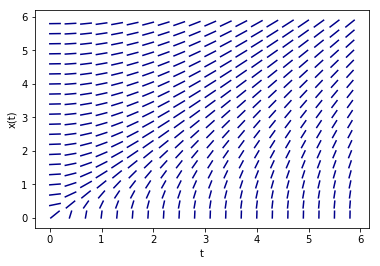

In [8]:
def foo(t, x):
    return 5/4 * t / x
slopeField(foo)

### Task 2

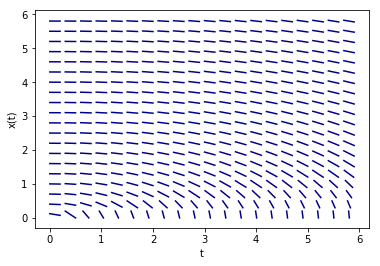

In [9]:
def foo(t, x):
    return -1/4 * t / x
slopeField(foo)

### Task 3

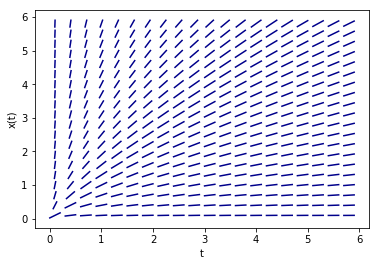

In [10]:
def foo(t, x):
    return 3/4 * x / t
slopeField(foo)

### Task 4

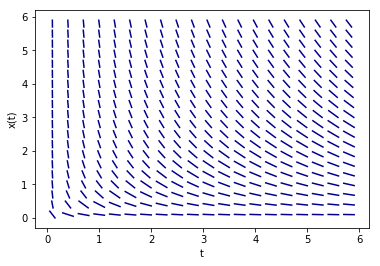

In [11]:
def foo(t, x):
    return -2 * x / t
slopeField(foo)

### Task 5

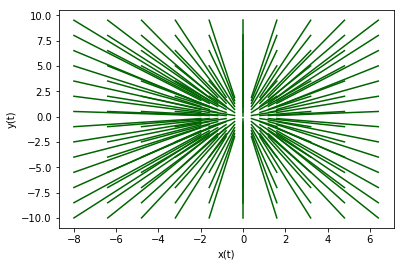

In [12]:
def foo(x, y): # first equation
    return 3 * x, 4 * y
vectorField(foo)

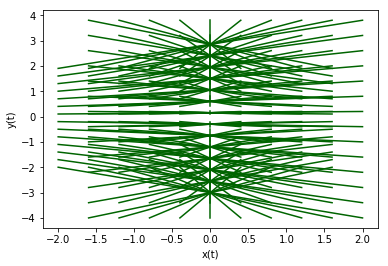

In [13]:
def foo(x, y): # second equation
    return -2 * x, y
vectorField(foo)

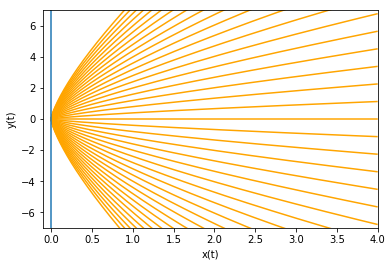

In [14]:
def foo(x): # first equation
    return x**(3/4)
phasePath(foo)

#### Выбранная фазовая кривая отмечена синим цветом (вертикальная прямая). Это верно, так как при заданом начальном решении, x постоянный и равен нулю.

/home/pavlik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


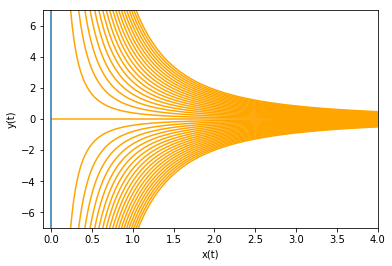

In [15]:
def foo(x): # first equation
    return x**(-2)
phasePath(foo)

#### Здесь абсолютно аналогичные рассуждения.